In [57]:
import re
import matplotlib.pyplot as plt

def plot_benchmark(file_name):
    print(file_name)
    log_file = file_name
    
    pattern = re.compile(
        r"SD write: (\d+) B in (\d+) us, ~(\d+) KB/s, buf (\d+)/(\d+)"
    )
    
    times_us = []
    speeds_kb = []
    buf_fill = []
    buf_total = None
    
    with open(log_file, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                time_us = int(match.group(2))
                speed_kb = int(match.group(3))
                buf = int(match.group(4))
                total = int(match.group(5))
                times_us.append(time_us)
                speeds_kb.append(speed_kb)
                buf_fill.append(buf)
                buf_total = total
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(times_us, marker="o")
    plt.title("SD Write Time per 4096 B")
    plt.ylabel("Write Time (µs)")
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(speeds_kb, marker="o", color="orange")
    plt.title("SD Write Speed")
    plt.ylabel("Speed (KB/s)")
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(buf_fill, marker="o", color="green")
    plt.title("Buffer Fill")
    plt.ylabel("Buffer Fill (bytes)")
    plt.xlabel("Write Event #")
    plt.ylim(0, buf_total if buf_total else max(buf_fill))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

logs16MHz.txt


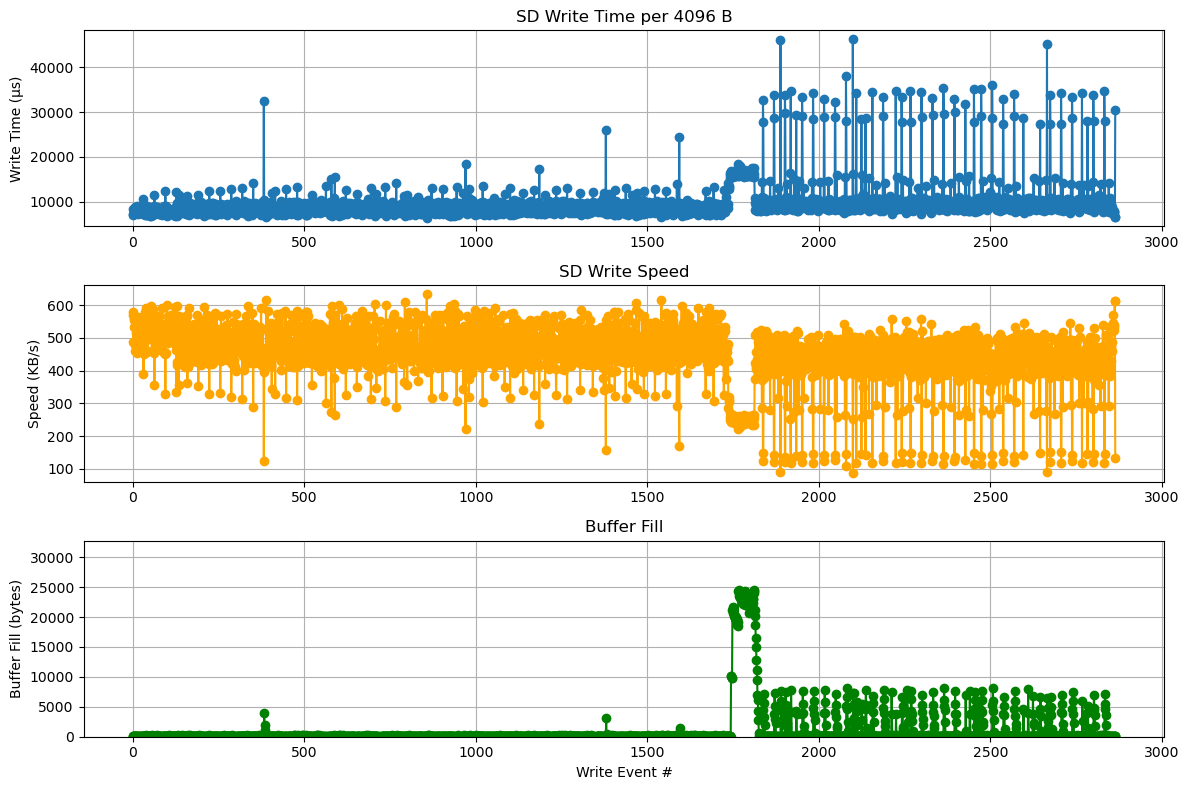

In [58]:
plot_benchmark("logs16MHz.txt")

logs32MHz.txt


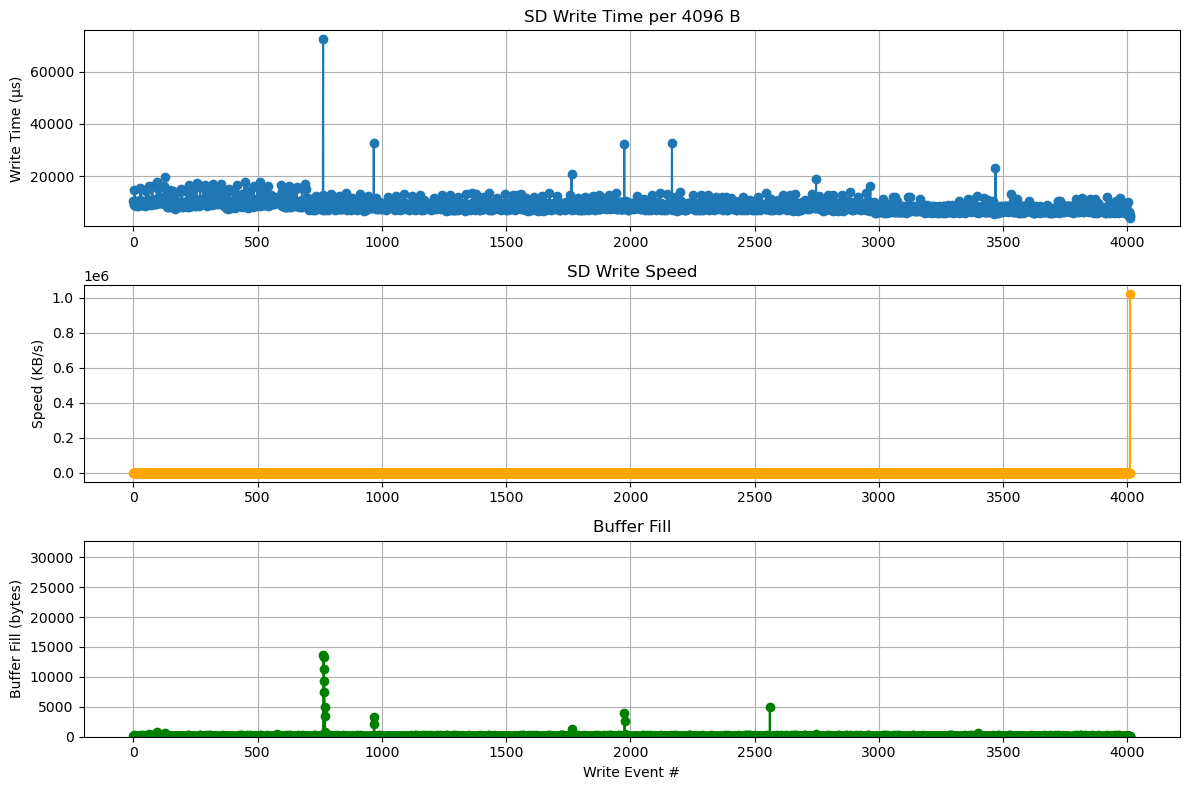

In [59]:
plot_benchmark("logs32MHz.txt")

logsBatchedFSYNC16MHz.txt


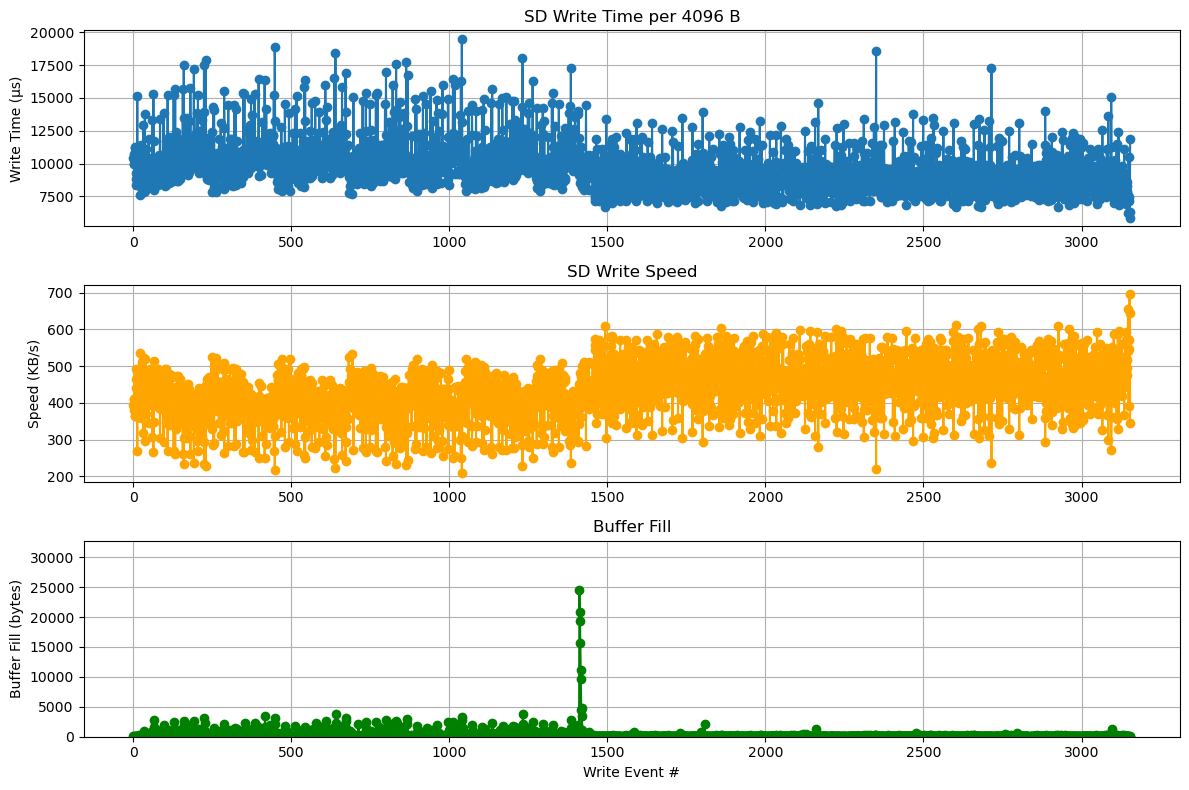

In [60]:
plot_benchmark("logsBatchedFSYNC16MHz.txt")

logsBatchedFSYNC32MHz.txt


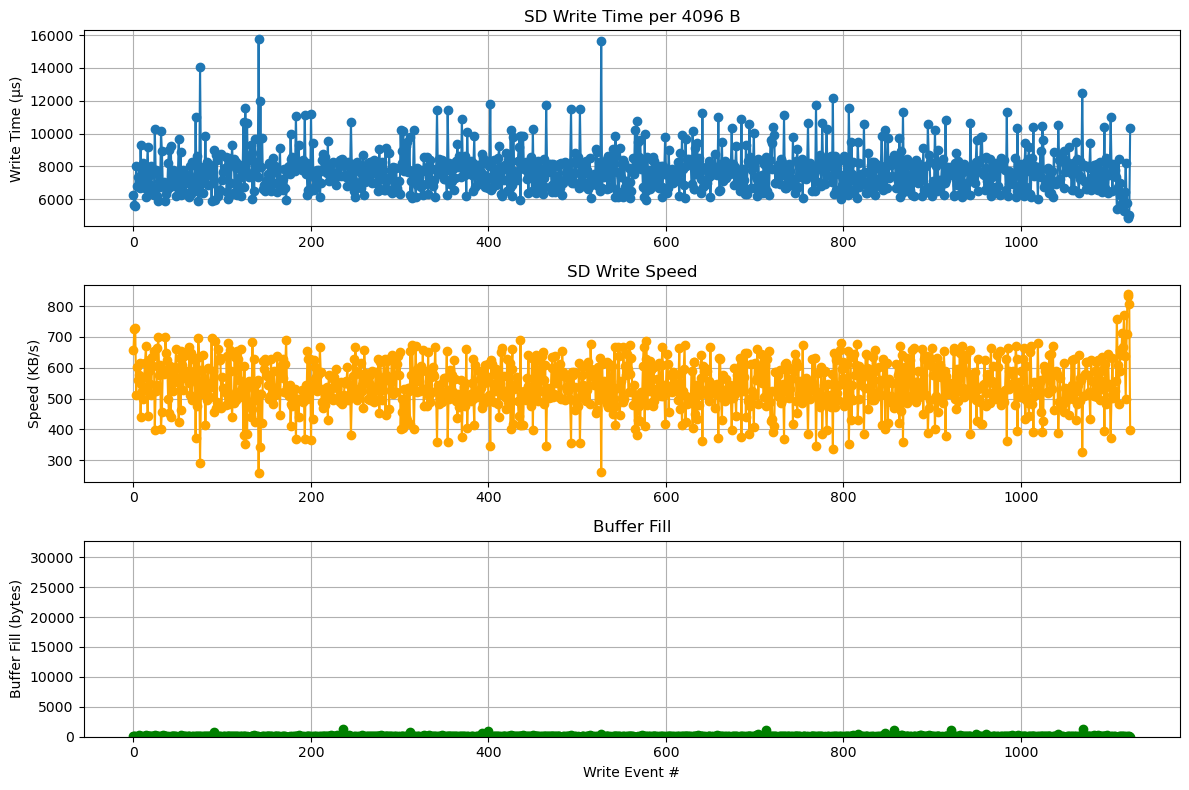

In [61]:
plot_benchmark("logsBatchedFSYNC32MHz.txt")

logsBatchedFSYNC16MHz5Min.txt


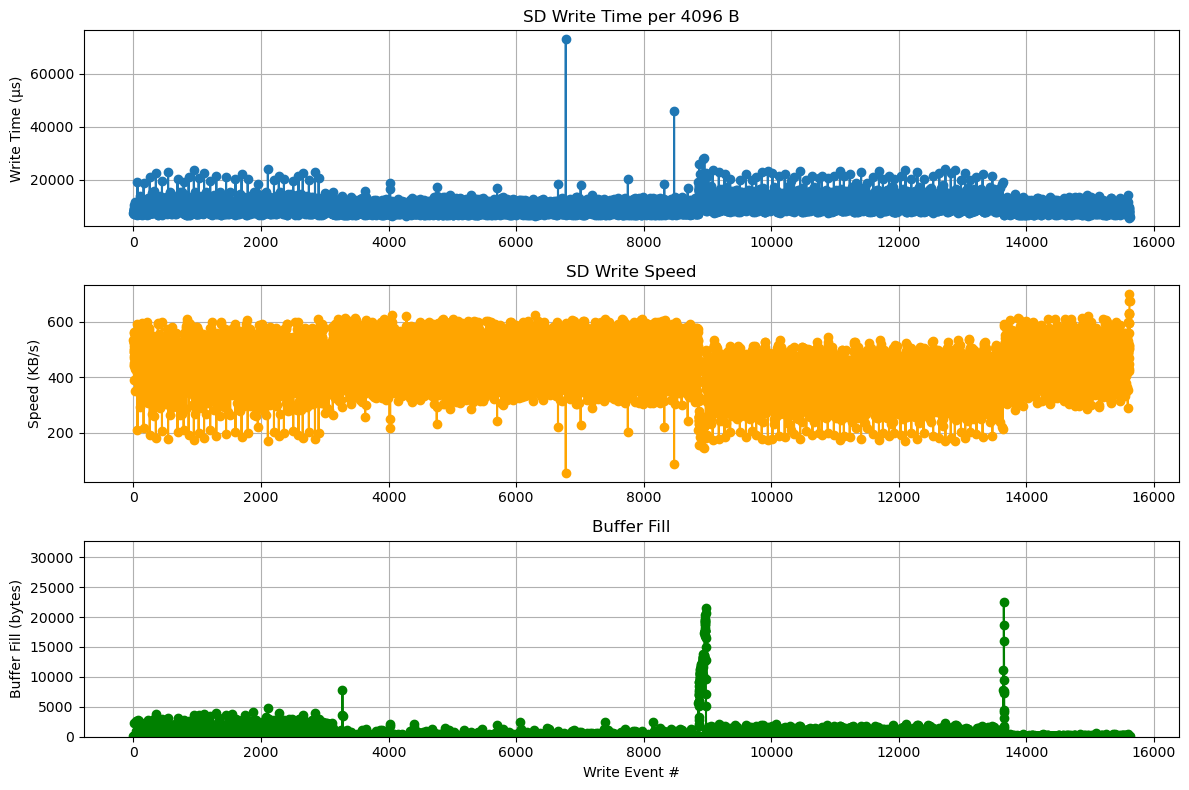

In [62]:
plot_benchmark("logsBatchedFSYNC16MHz5Min.txt")

logsBatchedFSYNC32MHz5Min.txt


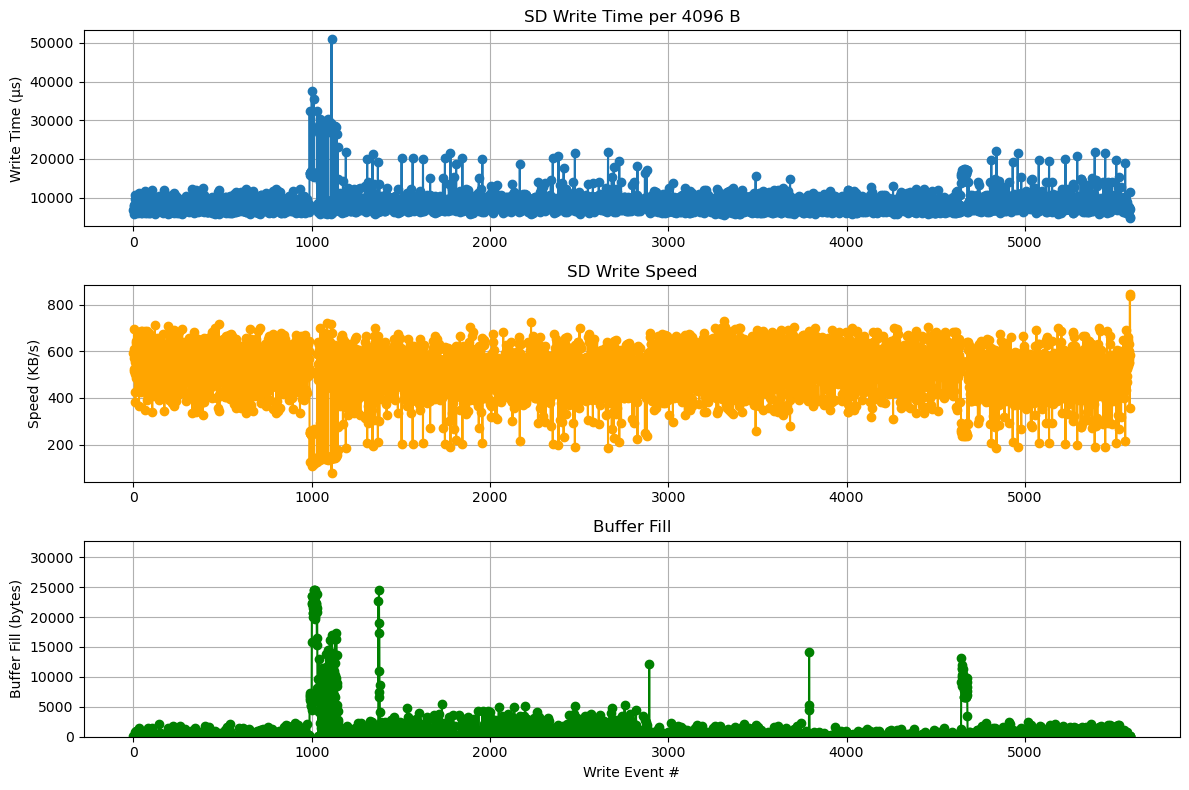

In [63]:
plot_benchmark("logsBatchedFSYNC32MHz5Min.txt")

largeBlockSize32MHz.txt


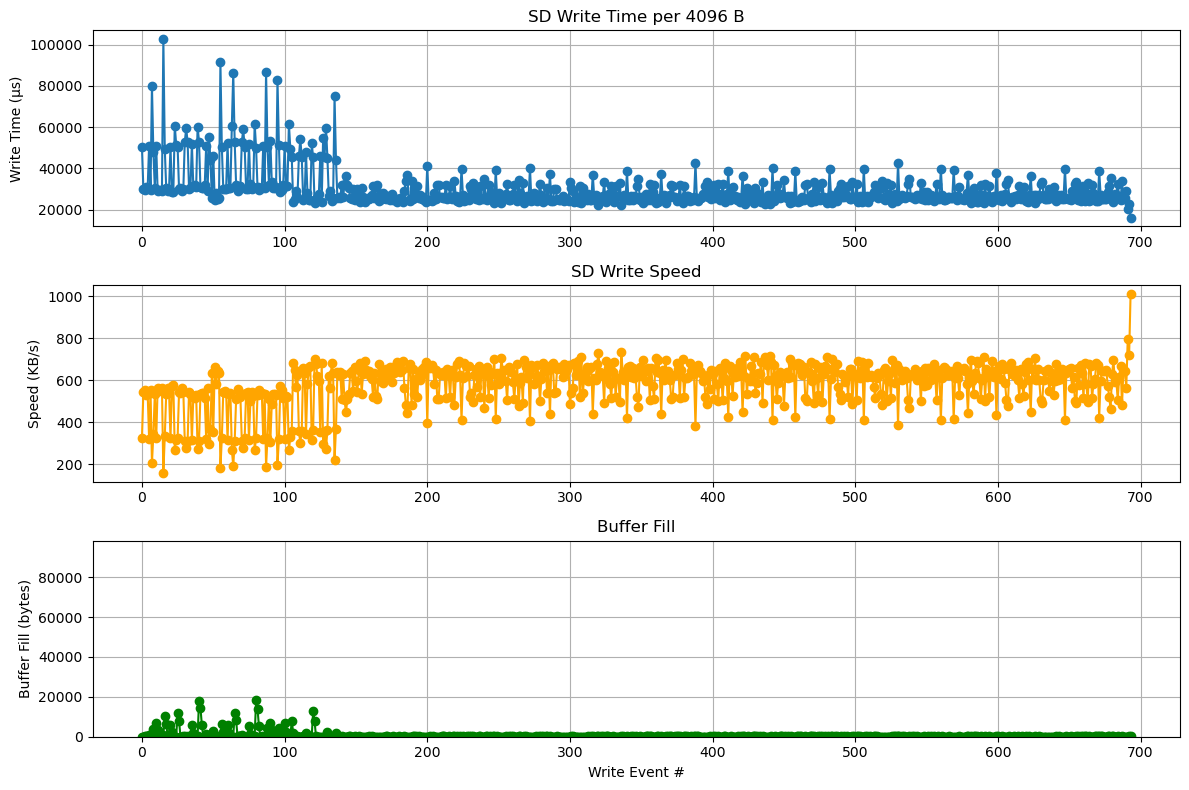

In [64]:
plot_benchmark("largeBlockSize32MHz.txt")